# **Actividad 4.1**: Procesos de la Vida Real como Distribuciones de Probabilidad

## **Nombre:** Mauricio Juárez Sánchez  
## **Matrícula:** A01660336


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 1. Selecciona un proceso o fenomeno del día a día que te interese analizar:
Se analizará un dataset que incluye la temperatura a día a día en distintas regiones del mundo.

### 2. Determina el atributo del proceso que podrías medir.
El atributo elegido a medir es la temperatura promedio por día. Estas medidas, fueron tomadas en distintas regiones del mundo.

In [2]:
df = pd.read_csv('city_temperature.csv')
df.head()

,Region,Country,State,City,Month,Day,Year,AvgTemperature
0,Africa,Algeria,NaN,Algiers,1,1,1995,64.2
1,Africa,Algeria,NaN,Algiers,1,2,1995,49.4
2,Africa,Algeria,NaN,Algiers,1,3,1995,48.8
3,Africa,Algeria,NaN,Algiers,1,4,1995,46.4
4,Africa,Algeria,NaN,Algiers,1,5,1995,47.9


In [3]:
# Preprocesamiento
df['AvgTemperature'] = pd.to_numeric(df['AvgTemperature'], errors='coerce')
df = df.dropna(subset=['AvgTemperature'])

### 4. Utiliza un histograma para graficar la frecuencia con la que ocurren las observaciones.

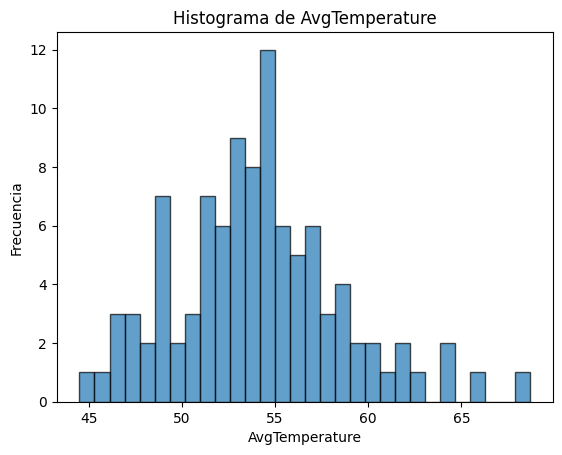

In [4]:
# Visualización del histograma
plt.hist(df['AvgTemperature'], bins=30, edgecolor='black', alpha=0.7)
plt.title('Histograma de AvgTemperature')
plt.xlabel('AvgTemperature')
plt.ylabel('Frecuencia')
plt.show()

### 5. Aplica una herramienta de ajuste de distribución para conocer cuál es el modelo más apropiado.

Vamos a utilizar la librería fitter para identificar entre algunas distribuciones a cual se asemeja. Es importante mencionar que se incluyen pocas distribuciones ya utilizar esta librería es computacionalmente costos para muchos modelos.

2024-05-12 18:27:26.490 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted expon distribution with error=0.306197)
2024-05-12 18:27:26.494 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted rayleigh distribution with error=0.184838)
2024-05-12 18:27:26.496 | INFO     | fitter.fitter:_fit_single_distribution:337 - Fitted norm distribution with error=0.171429)


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,0.171429,761.955395,767.165735,inf,0.077364,5.610442e-01
rayleigh,0.184838,713.735339,718.945680,inf,0.118595,1.106009e-01
expon,0.306197,708.733767,713.944107,inf,0.279505,2.114989e-07


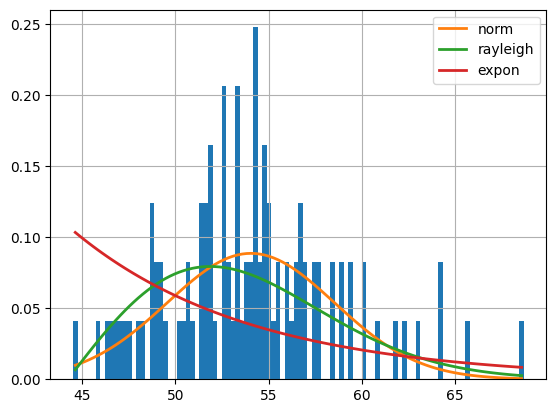

In [5]:
from fitter import Fitter

# Creando una instancia de Fitter con los datos y las distribuciones seleccionadas
f = Fitter(df['AvgTemperature'], distributions=['norm', 'expon', 'rayleigh'])

# Ajusta las distribuciones a los datos
f.fit()

# Muestra un resumen de las distribuciones
f.summary()


#### De las distribuciones seleccionadas, la normal es la que más se asemeja.

### 6. Identifica cuáles son los parámetros más apropiados que describen.
Una distribución normal o gaussiana, se describe por dos parámetros: La media y la desviación estandar. Procedemos a obtenerlos:

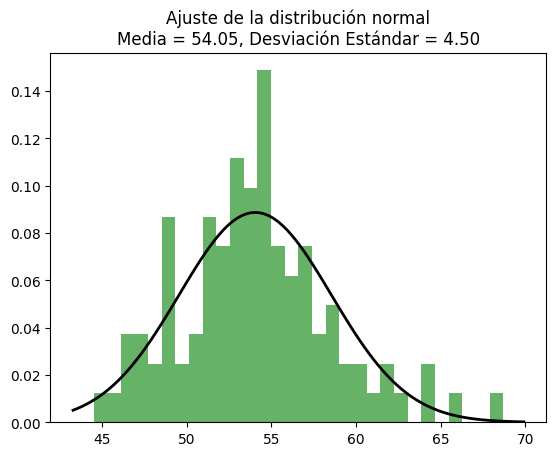

In [6]:
import scipy.stats as stats

# Elimninando registros vacíos
temperaturas = df['AvgTemperature'].dropna()

# Estimación de parámetros para la distribución normal
media, desviacion = np.mean(temperaturas), np.std(temperaturas)

# Generación de una distribución normal con los parámetros estimados
distribucion_normal = stats.norm(media, desviacion)

# Comparación de los datos con la distribución estimada
plt.hist(temperaturas, bins=30, density=True, alpha=0.6, color='g')
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = distribucion_normal.pdf(x)
plt.plot(x, p, 'k', linewidth=2)
title = "Ajuste de la distribución normal\nMedia = {:.2f}, Desviación Estándar = {:.2f}".format(media, desviacion)
plt.title(title)
plt.show()


La formula de la función de densidad de probabilidad de una distribución normal es la siguiente:

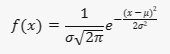

### 7.  Reflexión

Los parámetros fundamentales de una distribución normal son la media y la desviación estándar, las cuales hemos obtenido de nuestros datos utilizando la biblioteca scipy. La media nos indica el valor promedio alrededor del cual se agrupan los datos, mientras que la desviación estándar mide que tan dispersos están los datos en relación a esta media.

Este modelo estadístico es útil para diversas aplicaciones, incluyendo la predicción de temperaturas. Al basarnos en la función de distribución normal, podemos calcular la probabilidad de ocurrencia de ciertas temperaturas en el futuro. Esto es valioso para la planificación agrícola, como determinar la temporada óptima para la siembra en función de las temperaturas favorables para el crecimiento de ciertos cultivos. Además, nos permite anticipar las condiciones climáticas en una región específica, lo cual es relevante para la gestión de recursos y la preparación ante eventos meteorológicos.
Estos y muchos otros usos se pueden tener, por lo que la función creada anteriormente es muy relevante.